In [16]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
import scikit_posthocs as sp
import sys

from mpl_toolkits.mplot3d import axes3d

In [4]:
AllName="dataG.pkl"
ResizesName="dataM.pkl"
matrixIt="dataL.pkl"
matrixIt_Total="data_L_Total.csv"
n_cores=20
repet = 5 #CAMBIAR EL NUMERO SEGUN NUMERO DE EJECUCIONES POR CONFIG

p_value = 0.05
processes = [2,10,20,40,80,120,160]

positions = [321, 322, 323, 324, 325]
positions_small = [221, 222, 223, 224]

labels = ['(1,10)',   '(1,20)',   '(1,40)',  '(1,80)',  '(1,120)','(1,160)',
            '(10,1)', '(10,20)',  '(10,40)', '(10,80)', '(10,120)','(10,160)',
            '(20,1)', '(20,10)',  '(20,40)', '(20,80)', '(20,120)','(20,160)',
            '(40,1)', '(40,10)',  '(40,20)', '(40,80)', '(40,120)','(40,160)',
            '(80,1)', '(80,10)',  '(80,20)', '(80,40)', '(80,120)','(80,160)',
            '(120,1)','(120,10)', '(120,20)','(120,40)','(120,80)','(120,160)',
            '(160,1)','(160,10)', '(160,20)','(160,40)','(160,80)','(160,120)']

labelsExpand = ['(1,10)',   '(1,20)',   '(1,40)',  '(1,80)',  '(1,120)','(1,160)',
            '(10,20)',  '(10,40)', '(10,80)', '(10,120)','(10,160)',
            '(20,40)', '(20,80)', '(20,120)','(20,160)',
            '(40,80)', '(40,120)','(40,160)',
            '(80,120)','(80,160)',
            '(120,160)']
labelsShrink = ['(10,1)', 
            '(20,1)', '(20,10)',
            '(40,1)', '(40,10)',  '(40,20)',
            '(80,1)', '(80,10)',  '(80,20)', '(80,40)',
            '(120,1)','(120,10)', '(120,20)','(120,40)','(120,80)',
            '(160,1)','(160,10)', '(160,20)','(160,40)','(160,80)','(160,120)']

#                       WORST        BEST
labels_dist = ['null', 'SpreadFit', 'CompactFit']
                  #0          #1                #2                        #3
labelsMethods = ['Baseline', 'Baseline single','Baseline - Asynchronous','Baseline single - Asynchronous',
                 'Merge','Merge single','Merge - Asynchronous','Merge single - Asynchronous']
                  #4      #5             #6                     #7
    
colors_spawn = ['green','springgreen','blue','darkblue','red','darkred','darkgoldenrod','olive','violet']
linestyle_spawn = ['-', '--', '-.', ':']
markers_spawn = ['.','v','s','p', 'h','d','X','P','^']

OrMult_patch = mpatches.Patch(hatch='', facecolor='green', label='Baseline')
OrSing_patch = mpatches.Patch(hatch='', facecolor='springgreen', label='Baseline single')
OrPthMult_patch = mpatches.Patch(hatch='//', facecolor='blue', label='Baseline - Asyncrhonous')
OrPthSing_patch = mpatches.Patch(hatch='\\', facecolor='darkblue', label='Baseline single - Asyncrhonous')
MergeMult_patch = mpatches.Patch(hatch='||', facecolor='red', label='Merge')
MergeSing_patch = mpatches.Patch(hatch='...', facecolor='darkred', label='Merge single')
MergePthMult_patch = mpatches.Patch(hatch='xx', facecolor='yellow', label='Merge - Asyncrhonous')
MergePthSing_patch = mpatches.Patch(hatch='++', facecolor='olive', label='Merge single - Asyncrhonous')

handles_spawn = [OrMult_patch,OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]

In [14]:
dfG = pd.read_pickle( AllName )

dfG['ADR'] = (dfG['ADR'] / dfG['DR']) * 100
dfG['SDR'] = (dfG['SDR'] / dfG['DR']) * 100
       
group = dfG.groupby(['Groups','ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_total']

grouped_aggG = group.agg(['median'])
grouped_aggG.rename(columns={'median':'T_total'}, inplace=True)
grouped_aggG.to_excel("resultG.xlsx") 

In [23]:
grouped_aggG

T_total
Groups     ADR  Spawn_Method Redistribution_Method Redistribution_Strategy            
(2, 10)    0.0  (0, 0)       (0, 0)                (1, 1)                   389.577585
                             (0, 1)                (1, 1)                   389.559350
           96.6 (0, 0)       (0, 0)                (1, 1)                   390.670604
                                                   (1, 2)                   390.207550
                             (0, 1)                (1, 1)                   390.094789
...                                                                                ...
(160, 120) 0.0  (0, 0)       (0, 1)                (1, 1)                   143.140648
           96.6 (0, 0)       (0, 0)                (1, 1)                   147.587313
                                                   (1, 2)                   146.947540
                             (0, 1)                (1, 1)                   142.850494
                                                   (1, 2)                   143.274009

[252 rows x 1 columns]

In [10]:
dfG

Total_Groups  Total_Stages  Granularity         SDR   ADR          DR  \
0               2             4       100000  3947883504   0.0  3947883504   
1               2             4       100000  3947883504   0.0  3947883504   
2               2             4       100000  3947883504   0.0  3947883504   
3               2             4       100000  3947883504   0.0  3947883504   
4               2             4       100000  3947883504   0.0  3947883504   
..            ...           ...          ...         ...   ...         ...   
835             2             4       100000   134228039  96.6  3947883503   
836             2             4       100000   134228039  96.6  3947883503   
837             2             4       100000   134228039  96.6  3947883503   
838             2             4       100000   134228039  96.6  3947883503   
839             2             4       100000   134228039  96.6  3947883503   

    Redistribution_Method Redistribution_Strategy Spawn_Method Spawn_Strategy  \
0                  (0, 1)                  (1, 1)       (0, 0)         (1, 1)   
1                  (0, 1)                  (1, 1)       (0, 0)         (1, 1)   
2                  (0, 1)                  (1, 1)       (0, 0)         (1, 1)   
3                  (0, 1)                  (1, 1)       (0, 0)         (1, 1)   
4                  (0, 1)                  (1, 1)       (0, 0)         (1, 1)   
..                    ...                     ...          ...            ...   
835                (0, 0)                  (1, 2)       (0, 0)         (1, 2)   
836                (0, 0)                  (1, 2)       (0, 0)         (1, 2)   
837                (0, 0)                  (1, 2)       (0, 0)         (1, 2)   
838                (0, 0)                  (1, 2)       (0, 0)         (1, 2)   
839                (0, 0)                  (1, 2)       (0, 0)         (1, 2)   

     ...          Stage_Bytes       Iters Asynch_Iters  \
0    ...  (0, 8, 8, 33176880)  (500, 500)       (0, 0)   
1    ...  (0, 8, 8, 33176880)  (500, 500)       (0, 0)   
2    ...  (0, 8, 8, 33176880)  (500, 500)       (0, 0)   
3    ...  (0, 8, 8, 33176880)  (500, 500)       (0, 0)   
4    ...  (0, 8, 8, 33176880)  (500, 500)       (0, 0)   
..   ...                  ...         ...          ...   
835  ...  (0, 8, 8, 33176880)  (500, 500)       (2, 0)   
836  ...  (0, 8, 8, 33176880)  (500, 500)       (2, 0)   
837  ...  (0, 8, 8, 33176880)  (500, 500)       (2, 0)   
838  ...  (0, 8, 8, 33176880)  (500, 500)       (2, 0)   
839  ...  (0, 8, 8, 33176880)  (500, 500)       (2, 0)   

                                                T_iter  \
0    ((0.317149, 0.217414, 0.134276, 0.148773, 0.15...   
1    ((0.234715, 0.150659, 0.147628, 0.130321, 0.13...   
2    ((0.224323, 0.165911, 0.147396, 0.139989, 0.12...   
3    ((0.211829, 0.151569, 0.152718, 0.128219, 0.11...   
4    ((0.211283, 0.148917, 0.133463, 0.135542, 0.13...   
..                                                 ...   
835  ((0.161252, 0.143764, 0.143709, 0.143632, 0.14...   
836  ((0.159672, 0.142413, 0.142332, 0.142328, 0.14...   
837  ((0.161999, 0.144079, 0.144051, 0.144055, 0.14...   
838  ((0.159451, 0.142453, 0.142414, 0.142388, 0.14...   
839  ((0.161346, 0.143941, 0.14389, 0.143897, 0.143...   

                                              T_stages      T_spawn  \
0    (((0.010701, 0.015691, 0.005213, 0.280889), (0...  (2.954793,)   
1    (((0.010705, 0.020385, 0.016089, 0.171352), (0...  (2.997034,)   
2    (((0.011214, 0.003196, 0.004736, 0.187174), (0...  (2.962994,)   
3    (((0.0107, 0.020957, 0.00406, 0.174168), (0.01...  (3.049718,)   
4    (((0.010703, 0.010967, 0.000106, 0.171724), (0...  (3.106215,)   
..                                                 ...          ...   
835  (((0.124864, 0.000256, 4.5e-05, 0.036086), (0....  (2.302374,)   
836  (((0.124902, 0.000214, 2.8e-05, 0.034524), (0....  (5.546667,)   
837  (((0.124852, 0.00023, 7.5e-05, 0.036838), (0.1...  (3.725

In [ ]:
used_direction='s'
test_parameter='T_total'
    
if used_direction=='s':
    df_aux=grouped_aggG.query('NP > NS')
    used_labels=labelsShrink
    name_fig="Shrink"
    np_aux = [10, 20,20, 40,40,40, 80,80,80,80, 120,120,120,120,120]
    nc_aux = [1,  1,10,  1,10,20,  1,10,20,40,  1,10,20,40,80]
elif used_direction=='e':
    df_aux=grouped_aggM.query('NP < NS')
    used_labels=labelsExpand
    name_fig="Expand"
    np_aux = [1,1,1,1,1,        10,10,10,10,  20,20,20,  40,40,  80 ]
    nc_aux = [10,20,40,80,120,  20,40,80,120, 40,80,120, 80,120, 120]
elif used_direction=='a':
    df_aux=grouped_aggM
    used_labels=labels
    name_fig="All"
    np_aux = [1,1,1,1,1,        10,10,10,10,10, 20,20,20,20,20, 40,40,40,40,40, 80,80,80,80,80, 120,120,120,120,120]
    nc_aux = [10,20,40,80,120,  1,20,40,80,120, 1,10,40,80,120, 1,10,20,80,120, 1,10,20,40,120, 1,10,20,40,80]
    
x = np.arange(len(used_labels))
handles = []

f=plt.figure(figsize=(20, 12))
#ax=f.add_subplot(111)
ax = plt.axes(projection='3d')
ax.azim = -60
ax.dist = 10
ax.elev = 10
ax.set_xlabel("NP", fontsize=20)
ax.set_ylabel("NC", fontsize=20)
ax.set_zlabel("Alpha", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)

for cst_aux in [1,3]:
    df_aux2 = df_aux.query('Cst == @cst_aux')
    for css_aux in [0,1]:
        array_aux = df_aux2.query('Css == @css_aux')['alpha'].values
        ax.plot3D(np_aux, nc_aux, array_aux, colors_spawn[cst_aux*2 + css_aux])
      
        handles.append(handles_spawn[cst_aux*2 + css_aux])
        
#ax.set_zlim(0,4)
plt.legend(handles=handles, loc='best', fontsize=20,ncol=2,framealpha=1)
        
f.tight_layout()
f.savefig("Images/Spawn/3dPlot_"+name_fig+'_'+test_parameter+".png", format="png")

In [ ]:
class MalleabilityIterator:
    def __init__(self):
        self._sm = [0,1]
        self._rm = [0,1]
        self._rs = [1,2]
        self._adr = [0,96.6]
        self._arrays = [self._sm, self._rm, self._rs, self._adr]
        self._max_index = len(self._sm) * len(self._rm) * len(self._rs) * len(self._adr)
        self._in_use = [0]*4
        self._index = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self._index < self._max_index:
            for index in len(self._arrays):
                if self._in_use[index] < len(self._arrays[index])-1:
                    self._in_use[index]+=1
                    break
                elif index == len(self._arrays) - 1 && self._in_use[index] == len(self._arrays[index])-1:
            result = []
            for index in len(self._arrays):
                result.append(self._arrays[index][self._in_use[index]])
            
            self._index += 1
            return tuple(result)
        else:
            raise StopIteration

In [ ]:
for sp_method in [0,1]:
    df_aux = grouped_aggG.query('Spawn_Method == @sp_method')
    for rp_method in [0,1]:
        df_aux = grouped_aggG.query('Redistribution_Method == @rp_method')

[[-0.00982064 -0.0113957  -0.01319036 ... -0.01522953 -0.01319036
  -0.0113957 ]
 [-0.0113957  -0.01322338 -0.01530587 ... -0.01767209 -0.01530587
  -0.01322338]
 [-0.01319036 -0.01530587 -0.01771632 ... -0.02045518 -0.01771632
  -0.01530587]
 ...
 [-0.01200234 -0.01414685 -0.01660867 ...  0.02918791  0.03019517
   0.03085725]
 [-0.01097235 -0.01288301 -0.01507265 ...  0.01583738  0.01709512
   0.01804782]
 [-0.00988645 -0.01157475 -0.01350698 ...  0.00702321  0.0083816
   0.00947216]]


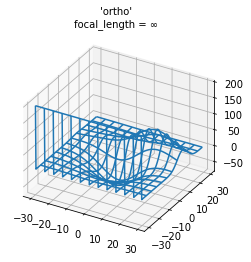

In [24]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})

# Get the test data
X, Y, Z = axes3d.get_test_data(0.05)


Z[0] = 200

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.set_proj_type('ortho')  # FOV = 0 deg
ax.set_title("'ortho'\nfocal_length = ∞", fontsize=10)
plt.show()

In [32]:
print(X[1])

[-3.0000000e+01 -2.9500000e+01 -2.9000000e+01 -2.8500000e+01
 -2.8000000e+01 -2.7500000e+01 -2.7000000e+01 -2.6500000e+01
 -2.6000000e+01 -2.5500000e+01 -2.5000000e+01 -2.4500000e+01
 -2.4000000e+01 -2.3500000e+01 -2.3000000e+01 -2.2500000e+01
 -2.2000000e+01 -2.1500000e+01 -2.1000000e+01 -2.0500000e+01
 -2.0000000e+01 -1.9500000e+01 -1.9000000e+01 -1.8500000e+01
 -1.8000000e+01 -1.7500000e+01 -1.7000000e+01 -1.6500000e+01
 -1.6000000e+01 -1.5500000e+01 -1.5000000e+01 -1.4500000e+01
 -1.4000000e+01 -1.3500000e+01 -1.3000000e+01 -1.2500000e+01
 -1.2000000e+01 -1.1500000e+01 -1.1000000e+01 -1.0500000e+01
 -1.0000000e+01 -9.5000000e+00 -9.0000000e+00 -8.5000000e+00
 -8.0000000e+00 -7.5000000e+00 -7.0000000e+00 -6.5000000e+00
 -6.0000000e+00 -5.5000000e+00 -5.0000000e+00 -4.5000000e+00
 -4.0000000e+00 -3.5000000e+00 -3.0000000e+00 -2.5000000e+00
 -2.0000000e+00 -1.5000000e+00 -1.0000000e+00 -5.0000000e-01
 -1.0658141e-13  5.0000000e-01  1.0000000e+00  1.5000000e+00
  2.0000000e+00  2.50000